In [1]:
#画像を表現するクラスをロード
from PIL import Image
import numpy as np
#画像をsampleを開く
img = Image.open('image_shiba.jpg')

# グレースケールに変換
gray_img = img.convert('L')
gray_img.save('sample-gray.jpg')

height, width = gray_img.size
# 画像を配列に変換
img_pixels = np.array([[gray_img.getpixel((j,i)) for j in range(height)] for i in range(width)])

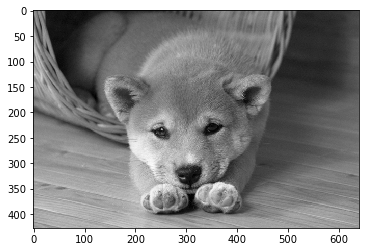

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img_pixels,'gray')
plt.show()

In [2]:
img_pixels

array([[151, 149, 152, ...,  94,  92,  94],
       [152, 157, 152, ...,  93,  92,  93],
       [152, 153, 155, ...,  92,  92,  92],
       ..., 
       [160, 160, 159, ..., 168, 165, 167],
       [173, 169, 167, ..., 164, 166, 168],
       [175, 174, 176, ..., 158, 157, 159]])

In [3]:
from math import *
def gaussian(x, y, sigma):
    return 1 / (2*pi*sigma**2) * exp(- (x**2 + y**2) / 2*sigma**2)

In [17]:
sigma = 1
gaussian_filter = np.array([gaussian(x-1, y-1, sigma) for x in range(3) for y in range(3)]).reshape((3, 3))

In [18]:
gaussian_filter

array([[  8.84133966e-14,   2.37246109e-08,   8.84133966e-14],
       [  2.37246109e-08,   6.36619772e-03,   2.37246109e-08],
       [  8.84133966e-14,   2.37246109e-08,   8.84133966e-14]])

In [19]:
height, width = img_pixels.shape
N = 20
average_filter = np.ones(N**2).reshape((N, N)) / N**2

In [20]:
# フィルタをかけた後の画像の高さと幅
new_height = height - gaussian_filter.shape[0] + 1
new_width = width - gaussian_filter.shape[1] + 1

In [21]:
new_image = np.ones(new_height * new_width).reshape((new_height, new_width))
for i in range(new_height):
    for j in range(new_width):
        point = img_pixels[i : i + gaussian_filter.shape[0], j : j + gaussian_filter.shape[1]] * gaussian_filter
        new_image[i, j] = np.sum(point, axis=None)

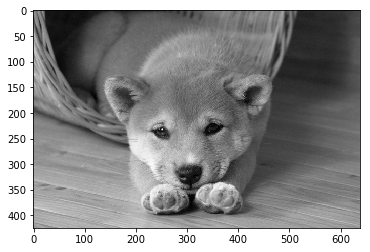

In [22]:
import matplotlib.pyplot as plt
plt.imshow(new_image, 'gray')
plt.show()

In [ ]:
new_image